# IRIS - Connection I

![Concatenate Layer](https://github.com/DrKAI/image/blob/main/Concatenate%20Layer.png?raw=true)

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [2]:
iris = load_iris()

x = iris.data
y = iris.target

In [3]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size=0.1, random_state=2022)

In [6]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((135, 4), (135,), (15, 4), (15,))

## **length끼리, width끼리**

In [7]:
print(df_x.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [8]:
tr_x_l = train_x.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
tr_x_w = train_x.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

In [9]:
tr_x_l.shape, tr_x_w.shape

((135, 2), (135, 2))

In [ ]:
te_x_l = test_x.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
te_x_w = test_x.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

## One-hot Encoding

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
train_y = to_categorical(train_y, 3)
test_y = to_categorical(test_y, 3)

In [15]:
tr_x_l.shape, tr_x_w.shape, train_y.shape

((135, 2), (135, 2), (135, 3))

## Modeling : multi-input & Concatenate layer

- Functional API

In [27]:
# 1. 세션 클리어
keras.backend.clear_session()

# 2. 레이어 사슬처럼 엮기
il_l = keras.layers.Input(shape=(2,))
hl_l = keras.layers.Dense(2, activation='relu')(il_l)

il_w = keras.layers.Input(shape=(2,))
hl_w = keras.layers.Dense(2, activation='relu')(il_w)

cl = keras.layers.Concatenate()([hl_l, hl_w])
ol = keras.layers.Dense(3, activation='softmax')(cl)

# 3. 모델의 시작과 끝 지정
model = keras.models.Model([il_l, il_w], ol)

# 4. 컴파일
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
              optimizer='adam')

# 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 2)            6           ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 2)            6           ['input_2[0][0]']                
                                                                                              

## 모델 시각화

In [18]:
from tensorflow.keras.utils import plot_model

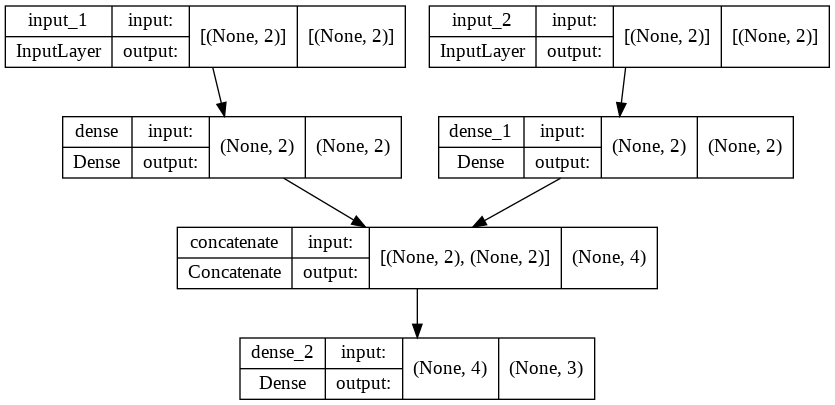

In [19]:
plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=1,
                   verbose=1,
                   restore_best_weights=True)

In [ ]:
model.fit([tr_x_l, tr_x_w], train_y, validation_split=0.1,
          epochs=1000, verbose=1, callbacks=[es])

---
---
---
---
---

# IRIS - Connection I practice

- 위의 코드를 **그대로** 따라서 코드 작성하기!

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [30]:
iris = load_iris()

x = iris.data
y = iris.target

In [31]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [32]:
from sklearn.model_selection import train_test_split

In [54]:
train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size=0.1, random_state=2022)

In [55]:
train_x.shape, train_y.shape

((135, 4), (135,))

## 추가) scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
mm_scaler = MinMaxScaler()

In [58]:
train_x = mm_scaler.fit_transform(train_x)
test_x = mm_scaler.transform(test_x)

In [59]:
train_x = pd.DataFrame(train_x, columns=iris.feature_names)
test_x = pd.DataFrame(test_x, columns=iris.feature_names)

## **length끼리, width끼리**

In [60]:
train_x.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [61]:
tr_x_l = train_x.loc[: , ['sepal length (cm)', 'petal length (cm)'] ]
tr_x_w = train_x.loc[: , ['sepal width (cm)', 'petal width (cm)'] ]

In [62]:
tr_x_l.head(1)

,sepal length (cm),petal length (cm)
0,0.323529,0.122807


In [63]:
tr_x_w.head(1)

,sepal width (cm),petal width (cm)
0,0.791667,0.125


In [64]:
te_x_l = test_x.loc[: , ['sepal length (cm)', 'petal length (cm)'] ]
te_x_w = test_x.loc[: , ['sepal width (cm)', 'petal width (cm)'] ]

## One-hot Encoding

In [65]:
train_y.shape

(135,)

In [66]:
from tensorflow.keras.utils import to_categorical

In [67]:
class_n = len(np.unique(train_y))

In [68]:
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

In [69]:
tr_x_l.shape, tr_x_w.shape, train_y.shape

((135, 2), (135, 2), (135, 3))

## Modeling : multi-input & Concatenate layer

In [70]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate

In [71]:
## 1. 세션 클리어
clear_session()

## 2. 레이어 엮기
il_l = Input(shape=(2,), name='input_length')
hl_l = Dense(2, activation='swish', name='hidden_l')(il_l)

il_w = Input(shape=(2,), name='input_width')
hl_w = Dense(2, activation='swish', name='hidden_w')(il_w)

cl = Concatenate(name='concat_layer')([hl_l, hl_w])
ol = Dense(3, activation='softmax', name='output')(cl)

## 3. 모델 시작 끝 지정
model = Model([il_l, il_w], ol)

## 4. 컴파일
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
              optimizer='adam')

## 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_length (InputLayer)      [(None, 2)]          0           []                               
                                                                                                  
 input_width (InputLayer)       [(None, 2)]          0           []                               
                                                                                                  
 hidden_l (Dense)               (None, 2)            6           ['input_length[0][0]']           
                                                                                                  
 hidden_w (Dense)               (None, 2)            6           ['input_width[0][0]']            
                                                                                              

## 모델 시각화

In [72]:
from tensorflow.keras.utils import plot_model

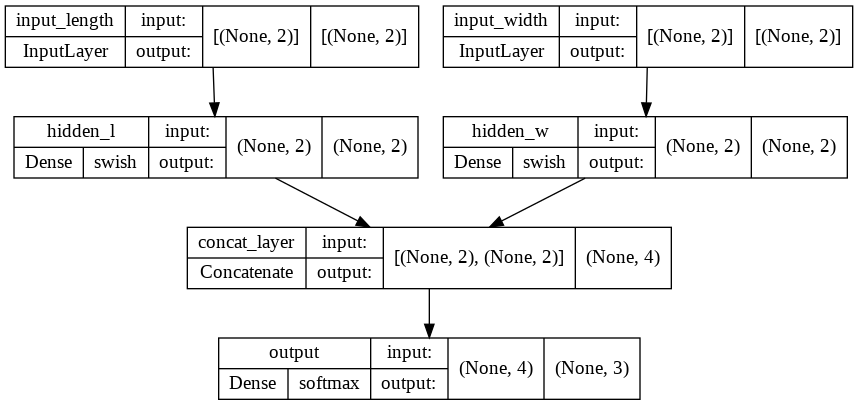

In [73]:
plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

## 학습 시켜보기!

In [74]:
from tensorflow.keras.callbacks import EarlyStopping

In [75]:
es = EarlyStopping(patience=1,
                   verbose=1,
                   restore_best_weights=True)

In [76]:
model.fit([tr_x_l, tr_x_w], train_y, validation_split=0.1, callbacks=[es],
          epochs=1000, verbose=1)

Epoch 1/1000
4/4 [==============================] - 1s 64ms/step - loss: 1.1664 - accuracy: 0.3471 - val_loss: 1.3221 - val_accuracy: 0.2143
Epoch 2/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.1606 - accuracy: 0.3471 - val_loss: 1.3137 - val_accuracy: 0.2143
Epoch 3/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.1547 - accuracy: 0.3471 - val_loss: 1.3058 - val_accuracy: 0.2143
Epoch 4/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.1491 - accuracy: 0.3471 - val_loss: 1.2983 - val_accuracy: 0.2143
Epoch 5/1000
4/4 [==============================] - 0s 11ms/step - loss: 1.1440 - accuracy: 0.3471 - val_loss: 1.2908 - val_accuracy: 0.2143
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 1.1391 - accuracy: 0.3471 - val_loss: 1.2831 - val_accuracy: 0.2143
Epoch 7/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.1339 - accuracy: 0.3471 - val_loss: 1.2757 - val_accuracy: 0.2143
Epoch 8/1000
